In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re

# picorv32/scripts/smtbmc/tracecmp.sh
# with enabled "assume (= [mem_ready_0] [mem_ready_1])"

logtext = """
##      0   0:00:00  Solver: yices
##      0   0:00:00  Checking asserts in step 0..
##      0   0:00:00  Checking asserts in step 1..
##      0   0:00:00  Checking asserts in step 2..
##      0   0:00:00  Checking asserts in step 3..
##      0   0:00:00  Checking asserts in step 4..
##      0   0:00:00  Checking asserts in step 5..
##      0   0:00:00  Checking asserts in step 6..
##      1   0:00:01  Checking asserts in step 7..
##      5   0:00:05  Checking asserts in step 8..
##     23   0:00:23  Checking asserts in step 9..
##     77   0:01:17  Checking asserts in step 10..
##    163   0:02:43  Checking asserts in step 11..
##    449   0:07:29  Checking asserts in step 12..
##    808   0:13:28  Checking asserts in step 13..
##   1903   0:31:43  Checking asserts in step 14..
##   4458   1:14:18  Checking asserts in step 15..
##   9078   2:31:18  Checking asserts in step 16..
##  18380   5:06:20  Checking asserts in step 17..
##  32954   9:09:14  Checking asserts in step 18..
##  66325  18:25:25  Checking asserts in step 19..
## 119110  33:05:10  Status: PASSED
"""

logdata = list()
for line in logtext.split("\n"):
    match = re.match(r"^##\s+(\d+).*(Checking asserts in step [^0]|Status:)", line)
    if match: logdata.append(int(match.group(1)))

logdata = np.array(logdata) / (60*60)

In [2]:
fig_logidx = np.arange(10, 20)
p = np.polyfit(fig_logidx, np.log(logdata[fig_logidx]), 1)
modeldata_x = np.arange(0, 19, 0.1)
modeldata_y = np.exp(modeldata_x * p[0] + p[1])

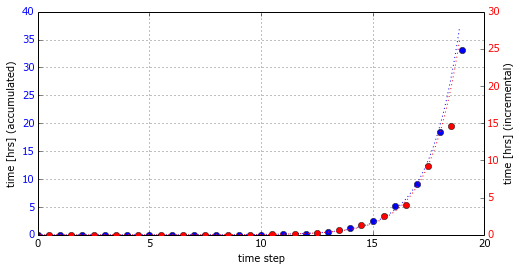

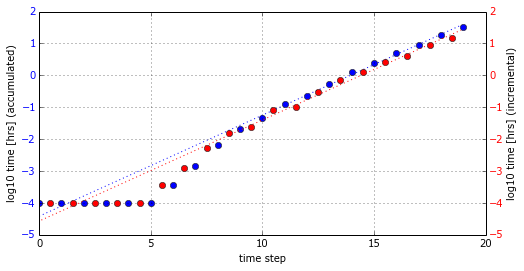

In [3]:
plt.figure(figsize=(8, 4))
plt.xlabel('time step')
plt.grid()

ax1 = plt.gca()
ax1.plot(logdata, 'ob')
ax1.plot(modeldata_x, modeldata_y, ':b')
ax1.set_ylabel('time [hrs] (accumulated)')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = plt.gca().twinx()
ax2.plot(np.arange(len(logdata)-1) + 0.5, np.diff(logdata), 'or')
ax2.plot(modeldata_x[1:], 10*np.diff(modeldata_y), ':r')
ax2.set_ylabel('time [hrs] (incremental)')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.show()


plt.figure(figsize=(8, 4))
plt.xlabel('time step')
plt.grid()

ax1 = plt.gca()
ax1.plot(np.log10(logdata + 1e-4), 'ob')
ax1.plot(modeldata_x, np.log10(modeldata_y), ':b')
ax1.set_ylabel('log10 time [hrs] (accumulated)')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = plt.gca().twinx()
ax2.plot(np.arange(len(logdata)-1) + 0.5, np.log10(np.diff(logdata) + 1e-4), 'or')
ax2.plot(modeldata_x[1:], np.log10(10*np.diff(modeldata_y)), ':r')
ax2.set_ylabel('log10 time [hrs] (incremental)')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.show()